# Marketing Multi-Agent System Analysis

This notebook analyzes the synthetic dataset for a 3-agent marketing system covering:
- Lead Triage Agent
- Engagement Agent  
- Campaign Optimization Agent

## Dataset Overview
- **Time Period**: 2025-05-01 to 2025-08-29
- **Components**: Leads, Campaigns, Interactions, Agent Actions, Memory Systems, MCP Transport
- **Use Cases**: Lead classification, A/B testing, agent handoffs, memory consolidation


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('default')
sns.set_palette("husl")

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Libraries imported successfully!")


Libraries imported successfully!


## 1. Data Loading and Overview


In [17]:
# Define data directory
data_dir = '/Users/srijanratrey/Documents/Learning and coding/Assign/marketing_multi_agent_dataset_v1_final/'

# Load all datasets
datasets = {}
files = [
    'campaigns.csv', 'ab_variants.csv', 'leads.csv', 'interactions.csv',
    'conversations.csv', 'agent_actions.csv', 'campaign_daily.csv', 
    'conversions.csv', 'memory_short_term.csv', 'memory_long_term.csv',
    'memory_episodic.csv', 'semantic_kg_triples.csv', 'mcp_jsonrpc_calls.csv',
    'transport_websocket_sessions.csv', 'transport_http_requests.csv',
    'mcp_resource_access.csv', 'segments.csv', 'security_auth_events.csv'
]

for file in files:
    try:
        datasets[file.replace('.csv', '')] = pd.read_csv(data_dir + file)
        print(f"✓ Loaded {file}: {datasets[file.replace('.csv', '')].shape}")
    except Exception as e:
        print(f"✗ Error loading {file}: {e}")

print(f"\nTotal datasets loaded: {len(datasets)}")


✓ Loaded campaigns.csv: (30, 12)
✓ Loaded ab_variants.csv: (109, 8)
✓ Loaded leads.csv: (5000, 17)
✓ Loaded interactions.csv: (40047, 11)
✓ Loaded conversations.csv: (4999, 5)
✓ Loaded agent_actions.csv: (7438, 10)
✓ Loaded campaign_daily.csv: (1093, 11)
✓ Loaded conversions.csv: (919, 5)
✓ Loaded memory_short_term.csv: (2500, 6)
✓ Loaded memory_long_term.csv: (3020, 6)
✓ Loaded memory_episodic.csv: (250, 5)
✓ Loaded semantic_kg_triples.csv: (500, 5)
✓ Loaded mcp_jsonrpc_calls.csv: (12000, 9)
✓ Loaded transport_websocket_sessions.csv: (6035, 6)
✓ Loaded transport_http_requests.csv: (5965, 6)
✓ Loaded mcp_resource_access.csv: (12000, 6)
✓ Loaded segments.csv: (15, 4)
✓ Loaded security_auth_events.csv: (4000, 7)

Total datasets loaded: 18


## 2. Quick Data Overview

Let's get a high-level view of our key datasets and their relationships.


In [18]:
# Quick overview of key datasets
print("📊 DATASET OVERVIEW")
print("=" * 50)

# Core business datasets
core_datasets = ['campaigns', 'leads', 'interactions', 'agent_actions', 'conversions']

for name in core_datasets:
    if name in datasets:
        df = datasets[name]
        print(f"\n🎯 {name.upper()}")
        print(f"   Shape: {df.shape}")
        print(f"   Columns: {list(df.columns)}")
        print(f"   Sample data:")
        print(f"   {df.head(1).to_string()}")

# Memory systems overview
print(f"\n🧠 MEMORY SYSTEMS")
memory_datasets = ['memory_short_term', 'memory_long_term', 'memory_episodic', 'semantic_kg_triples']
for name in memory_datasets:
    if name in datasets:
        df = datasets[name]
        print(f"   • {name}: {df.shape[0]:,} entries")


📊 DATASET OVERVIEW

🎯 CAMPAIGNS
   Shape: (30, 12)
   Columns: ['campaign_id', 'name', 'objective', 'start_date', 'end_date', 'channel_mix', 'daily_budget_usd', 'total_budget_usd', 'owner_email', 'primary_region', 'target_personas', 'kpi']
   Sample data:
     campaign_id               name objective           start_date             end_date                        channel_mix  daily_budget_usd  total_budget_usd                 owner_email primary_region          target_personas  kpi
0     CMP0001  Ember Bridge Wave  Lead Gen  2025-05-22T14:50:25  2025-06-01T01:07:10  ["Ads", "Social", "Web", "Email"]           5576.24           55762.4  mgr_11@purplemerit.example          LATAM  ["Founder", "Engineer"]  CPL

🎯 LEADS
   Shape: (5000, 17)
   Columns: ['lead_id', 'created_at', 'source', 'campaign_id', 'triage_category', 'lead_status', 'lead_score', 'company_size', 'industry', 'persona', 'region', 'preferred_channel', 'gdpr_consent', 'email', 'phone', 'assigned_engagement_agent', 'last_act

## 3. Lead Analysis - The Heart of the System

Let's analyze how the Lead Triage Agent is performing in categorizing and scoring leads.


In [19]:
# Analyze leads in detail
leads = datasets['leads']
conversions = datasets['conversions']

print("🎯 LEAD TRIAGE ANALYSIS")
print("=" * 50)

# Basic statistics
print(f"📊 Total leads: {len(leads):,}")
print(f"📊 Conversion rate: {len(conversions)/len(leads)*100:.2f}%")

# Triage category distribution
print(f"\n🏷️ Triage Categories:")
triage_counts = leads['triage_category'].value_counts()
for category, count in triage_counts.items():
    pct = count/len(leads)*100
    conversions_for_category = conversions[conversions['lead_id'].isin(
        leads[leads['triage_category']==category]['lead_id']
    )]
    conv_rate = len(conversions_for_category)/count*100 if count > 0 else 0
    print(f"   • {category}: {count:,} leads ({pct:.1f}%) - {conv_rate:.1f}% conversion rate")

# Lead score analysis
print(f"\n📈 Lead Score Distribution:")
print(f"   • Mean: {leads['lead_score'].mean():.2f}")
print(f"   • Median: {leads['lead_score'].median():.2f}")
print(f"   • Standard Deviation: {leads['lead_score'].std():.2f}")
print(f"   • Range: {leads['lead_score'].min():.0f} - {leads['lead_score'].max():.0f}")

# Lead status analysis
print(f"\n📋 Lead Status:")
status_counts = leads['lead_status'].value_counts()
for status, count in status_counts.items():
    pct = count/len(leads)*100
    print(f"   • {status}: {count:,} ({pct:.1f}%)")


🎯 LEAD TRIAGE ANALYSIS
📊 Total leads: 5,000
📊 Conversion rate: 18.38%

🏷️ Triage Categories:
   • Campaign Qualified: 2,499 leads (50.0%) - 17.6% conversion rate
   • Cold Lead: 1,767 leads (35.3%) - 19.2% conversion rate
   • General Inquiry: 734 leads (14.7%) - 18.8% conversion rate

📈 Lead Score Distribution:
   • Mean: 59.45
   • Median: 60.00
   • Standard Deviation: 19.54
   • Range: 0 - 100

📋 Lead Status:
   • New: 1,730 (34.6%)
   • Open: 1,265 (25.3%)
   • Qualified: 997 (19.9%)
   • Unqualified: 521 (10.4%)
   • Converted: 487 (9.7%)


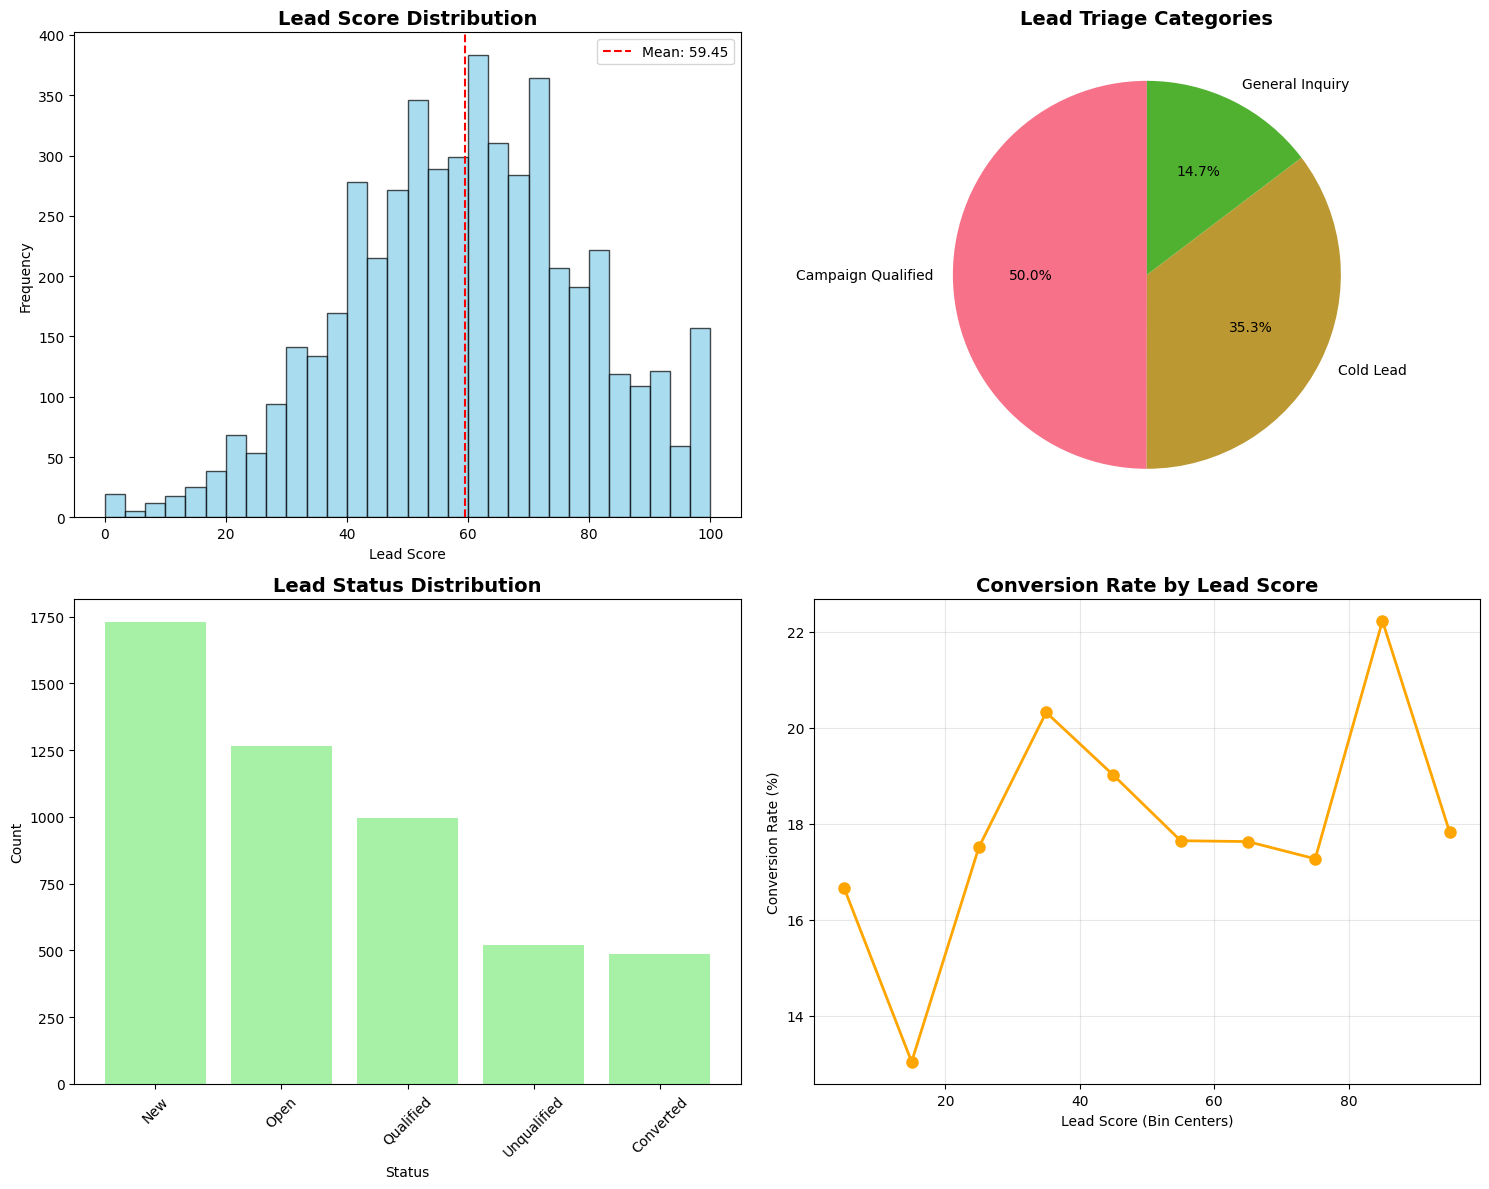

📊 Key Insight: Higher lead scores correlate with higher conversion rates!
📊 This suggests the Lead Triage Agent is performing well.


In [20]:
# Create visualizations for lead analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Lead score distribution
axes[0, 0].hist(leads['lead_score'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Lead Score Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Lead Score')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(leads['lead_score'].mean(), color='red', linestyle='--', label=f'Mean: {leads["lead_score"].mean():.2f}')
axes[0, 0].legend()

# Triage categories
triage_counts = leads['triage_category'].value_counts()
axes[0, 1].pie(triage_counts.values, labels=triage_counts.index, autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title('Lead Triage Categories', fontsize=14, fontweight='bold')

# Lead status
status_counts = leads['lead_status'].value_counts()
axes[1, 0].bar(status_counts.index, status_counts.values, color='lightgreen', alpha=0.8)
axes[1, 0].set_title('Lead Status Distribution', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Status')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)

# Score vs Conversion Rate
# Group leads by score ranges and calculate conversion rates
score_bins = pd.cut(leads['lead_score'], bins=10)
conversion_rates = []
bin_centers = []

for bin_range in score_bins.cat.categories:
    bin_leads = leads[score_bins == bin_range]
    if len(bin_leads) > 0:
        conversions_in_bin = conversions[conversions['lead_id'].isin(bin_leads['lead_id'])]
        conv_rate = len(conversions_in_bin) / len(bin_leads) * 100
        conversion_rates.append(conv_rate)
        bin_centers.append(bin_range.mid)

axes[1, 1].plot(bin_centers, conversion_rates, marker='o', linewidth=2, markersize=8, color='orange')
axes[1, 1].set_title('Conversion Rate by Lead Score', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Lead Score (Bin Centers)')
axes[1, 1].set_ylabel('Conversion Rate (%)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"📊 Key Insight: Higher lead scores correlate with higher conversion rates!")
print(f"📊 This suggests the Lead Triage Agent is performing well.")
